### Instalamos las librerias necesarias:

In [1]:
#pip install networkx
#pip install matplotlib

### Importamos las librerias necesarias:

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random

### Usando la Heuristica de Christofides:

### Creamos nuestro Grafo:

In [15]:
# Lista de nodos (ciudades), numeradas del 1 al 8:
cities = [1, 2, 3, 4, 5, 6, 7, 8]

# Matriz de distancias
distance_matrix = [
    [0, 29, 20, 21, 16, 31, 100, 12],
    [29, 0, 15, 29, 28, 40, 72, 21],
    [20, 15, 0, 15, 14, 25, 81, 9],
    [21, 29, 15, 0, 4, 12, 92, 12],
    [16, 28, 14, 4, 0, 16, 94, 9],
    [31, 40, 25, 12, 16, 0, 95, 24],
    [100, 72, 81, 92, 94, 95, 0, 90],
    [12, 21, 9, 12, 9, 24, 90, 0]
]

# Creamos el grafo y añadimos las ciudades (nodos):
G = nx.Graph()
G.add_nodes_from(cities)
print(G)

# Añadimos las aristas con los pesos (distancias entre las ciudades) al grafo:
print("Comienza Iteración")
for i in range(len(cities)):
    for j in range(i + 1, len(cities)):
        G.add_edge(cities[i], cities[j], weight=distance_matrix[i][j])
        print(i+1,j+1)
        print(G)
        print(distance_matrix[i][j])


Graph with 8 nodes and 0 edges
Comienza Iteración
1 2
Graph with 8 nodes and 1 edges
29
1 3
Graph with 8 nodes and 2 edges
20
1 4
Graph with 8 nodes and 3 edges
21
1 5
Graph with 8 nodes and 4 edges
16
1 6
Graph with 8 nodes and 5 edges
31
1 7
Graph with 8 nodes and 6 edges
100
1 8
Graph with 8 nodes and 7 edges
12
2 3
Graph with 8 nodes and 8 edges
15
2 4
Graph with 8 nodes and 9 edges
29
2 5
Graph with 8 nodes and 10 edges
28
2 6
Graph with 8 nodes and 11 edges
40
2 7
Graph with 8 nodes and 12 edges
72
2 8
Graph with 8 nodes and 13 edges
21
3 4
Graph with 8 nodes and 14 edges
15
3 5
Graph with 8 nodes and 15 edges
14
3 6
Graph with 8 nodes and 16 edges
25
3 7
Graph with 8 nodes and 17 edges
81
3 8
Graph with 8 nodes and 18 edges
9
4 5
Graph with 8 nodes and 19 edges
4
4 6
Graph with 8 nodes and 20 edges
12
4 7
Graph with 8 nodes and 21 edges
92
4 8
Graph with 8 nodes and 22 edges
12
5 6
Graph with 8 nodes and 23 edges
16
5 7
Graph with 8 nodes and 24 edges
94
5 8
Graph with 8 nodes a

### Utilizamos la Heuristica del Christofides para resolver el problema:

In [16]:
# Resolvemos el TSP utilizando el algoritmo de Christofides:
tsp_tour = nx.approximation.traveling_salesman_problem(G, cycle=True, method=nx.approximation.christofides)

# Imprimimos el tour para verificar el resultado del algoritmo:
print(f"Tour: {tsp_tour}")
type(tsp_tour)

Tour: [1, 8, 5, 4, 6, 7, 2, 3, 1]


list

In [23]:
# Calculamos la longitud del camino óptimo utilizando un ciclo for:
print(tsp_tour)
optimal_length = 0
for i in range(len(tsp_tour) - 1):
    try:
        optimal_length += G[tsp_tour[i]][tsp_tour[i+1]]['weight']
        print(tsp_tour[i], tsp_tour[i+1])
        print(G[tsp_tour[i]][tsp_tour[i+1]])
        print(optimal_length)
    except KeyError as e:
        print(f"Error: No se encontró una arista entre {tsp_tour[i]} y {tsp_tour[i+1]}")
        raise e

[1, 8, 5, 4, 6, 7, 2, 3, 1]
1 8
{'weight': 12}
12
8 5
{'weight': 9}
21
5 4
{'weight': 4}
25
4 6
{'weight': 12}
37
6 7
{'weight': 95}
132
7 2
{'weight': 72}
204
2 3
{'weight': 15}
219
3 1
{'weight': 20}
239


Cordenadas del Layout:
{1: array([-0.64076121, -0.48777414]), 2: array([0.38391048, 0.67558892]), 3: array([-0.32060074,  0.8895556 ]), 4: array([ 0.86358188, -0.56615045]), 5: array([ 0.02546336, -1.        ]), 6: array([0.73875343, 0.19677749]), 7: array([-0.05585877, -0.06946815]), 8: array([-0.99448843,  0.36147073])}
Etiquetas:
{(1, 2): 29, (1, 3): 20, (1, 4): 21, (1, 5): 16, (1, 6): 31, (1, 7): 100, (1, 8): 12, (2, 3): 15, (2, 4): 29, (2, 5): 28, (2, 6): 40, (2, 7): 72, (2, 8): 21, (3, 4): 15, (3, 5): 14, (3, 6): 25, (3, 7): 81, (3, 8): 9, (4, 5): 4, (4, 6): 12, (4, 7): 92, (4, 8): 12, (5, 6): 16, (5, 7): 94, (5, 8): 9, (6, 7): 95, (6, 8): 24, (7, 8): 90}


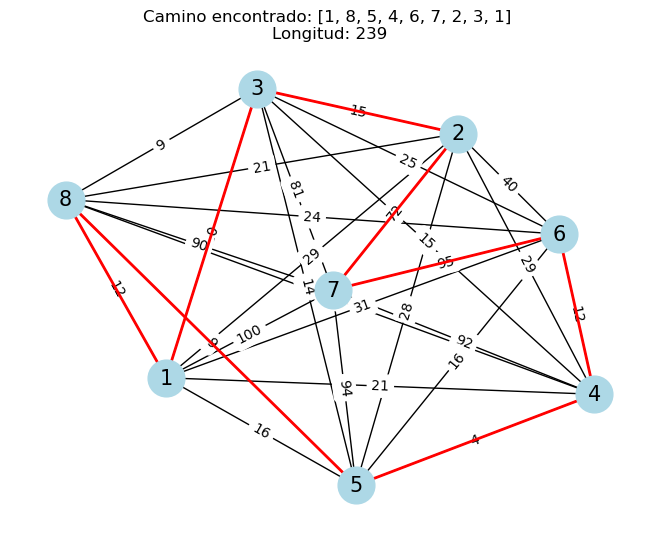

In [40]:
# Visualizamos el grafo y el camino óptimo encontrado:
cord = nx.spring_layout(G)
print(f"Cordenadas del Layout:\n{cord}")
nx.draw(G, cord, with_labels=True, node_color='lightblue', node_size=700, font_size=15)
labels = nx.get_edge_attributes(G, 'weight')
print(f"Etiquetas:\n{labels}")
nx.draw_networkx_edge_labels(G, cord, edge_labels=labels)

# Dibujamos el camino óptimo:
path_edges = [(tsp_tour[i], tsp_tour[i+1]) for i in range(len(tsp_tour)-1)]

# Cerramos el tour solo si los nodos son diferentes:
if tsp_tour[-1] != tsp_tour[0]:
    path_edges.append((tsp_tour[-1], tsp_tour[0]))
nx.draw_networkx_edges(G, cord, edgelist=path_edges, edge_color='r', width=2)

# Mostramos el camino óptimo:
plt.title(f'Camino encontrado: {tsp_tour} \nLongitud: {optimal_length}')
plt.show()